# Data Cleaning and EDA for Climate Dataset for Jena over 7 years : 2009 to 2016

This is an explanatory data analysis for weather data for Jena which can be later used to predict temperature and rainfall trends for future years.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)
#Loading Data into a dataframe object
df = pd.read_csv('jena_climate_2009_2016.csv')

The Weather Data for Jena is of the following form consisting of climate data ( Temperatures(ambient and Dewpoint), Air Density , Relative Humidity , Wind velocity) captured over 7 years , each day withing 10 minute intervals

In [2]:
df.head(7)

Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   
5  01.01.2009 01:00:00    996.50     -8.05    265.38        -8.78    94.4   
6  01.01.2009 01:10:00    996.50     -7.62    265.81        -8.30    94.8   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   
5          3.33          3.14          0.19       1.96             3.15   
6          3.44          3.26          0.18       2.04             3.27   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       1307.75      1.03           1.75     152.3  
1       1309.80      0.72           1.50     136.1  
2       1310.24      0.19           0.63     171.6  
3       1309.19      0.34           0.50     198.0  
4       1309.00      0.32           0.63     214.3  
5       1307.86      0.21           0.63     192.7  
6       1305.68      0.18           0.63     166.5

In [3]:
#Size of Data
df.shape

(420551, 15)

# Overall pattern (statistical/ numerical summaries)

Descriptive statistics for the climate data is found as below:
It represents the five number summaries (mean/median, min, max, q1, q3)in the dataframe for each of the columns

In [4]:
df.describe()

p (mbar)       T (degC)       Tpot (K)    Tdew (degC)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean      989.212776       9.450147     283.492743       4.955854   
std         8.358481       8.423365       8.504471       6.730674   
min       913.600000     -23.010000     250.600000     -25.010000   
25%       984.200000       3.360000     277.430000       0.240000   
50%       989.580000       9.420000     283.470000       5.220000   
75%       994.720000      15.470000     289.530000      10.070000   
max      1015.350000      37.280000     311.340000      23.110000   

              rh (%)   VPmax (mbar)   VPact (mbar)   VPdef (mbar)  \
count  420551.000000  420551.000000  420551.000000  420551.000000   
mean       76.008259      13.576251       9.533756       4.042412   
std        16.476175       7.739020       4.184164       4.896851   
min        12.950000       0.950000       0.790000       0.000000   
25%        65.210000       7.780000       6.210000       0.870000   
50%        79.300000      11.820000       8.860000       2.190000   
75%        89.400000      17.600000      12.350000       5.300000   
max       100.000000      63.770000      28.320000      46.010000   

           sh (g/kg)  H2OC (mmol/mol)   rho (g/m**3)       wv (m/s)  \
count  420551.000000    420551.000000  420551.000000  420551.000000   
mean        6.022408         9.640223    1216.062748       1.702224   
std         2.656139         4.235395      39.975208      65.446714   
min         0.500000         0.800000    1059.450000   -9999.000000   
25%         3.920000         6.290000    1187.490000       0.990000   
50%         5.590000         8.960000    1213.790000       1.760000   
75%         7.800000        12.490000    1242.770000       2.860000   
max        18.130000        28.820000    1393.540000      28.490000   

       max. wv (m/s)       wd (deg)  
count  420551.000000  420551.000000  
mean        3.056555     174.743738  
std        69.016932      86.681693  
min     -9999.000000       0.000000  
25%         1.760000     124.900000  
50%         2.960000     198.100000  
75%         4.740000     234.100000  
max        23.500000     360.000000

To check for the presence of missing/null values, the following operations are to be carried out: 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
Date Time          420551 non-null object
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [6]:
df.isnull().sum()

Date Time          0
p (mbar)           0
T (degC)           0
Tpot (K)           0
Tdew (degC)        0
rh (%)             0
VPmax (mbar)       0
VPact (mbar)       0
VPdef (mbar)       0
sh (g/kg)          0
H2OC (mmol/mol)    0
rho (g/m**3)       0
wv (m/s)           0
max. wv (m/s)      0
wd (deg)           0
dtype: int64

As observed , the dataframe doesnot contain any missing/null values.

# Observing data Distributions with Histograms and Density plots

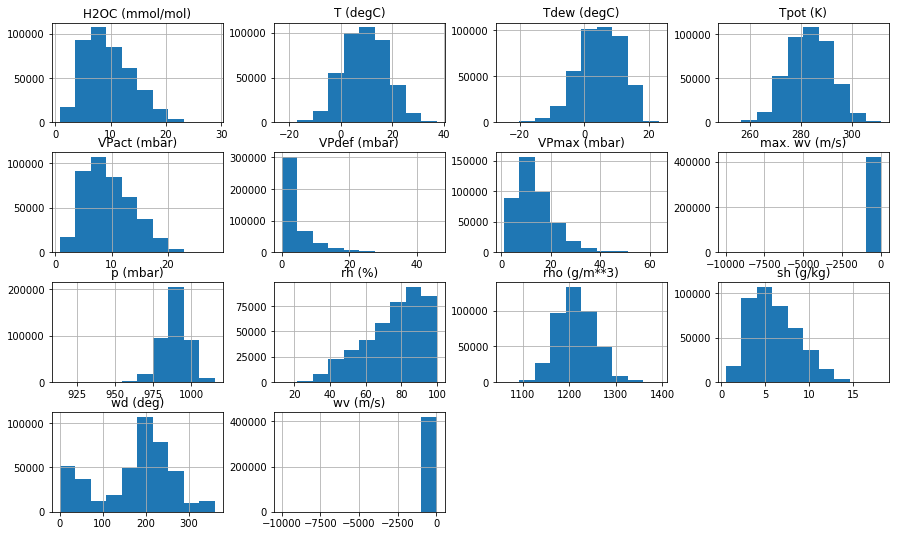

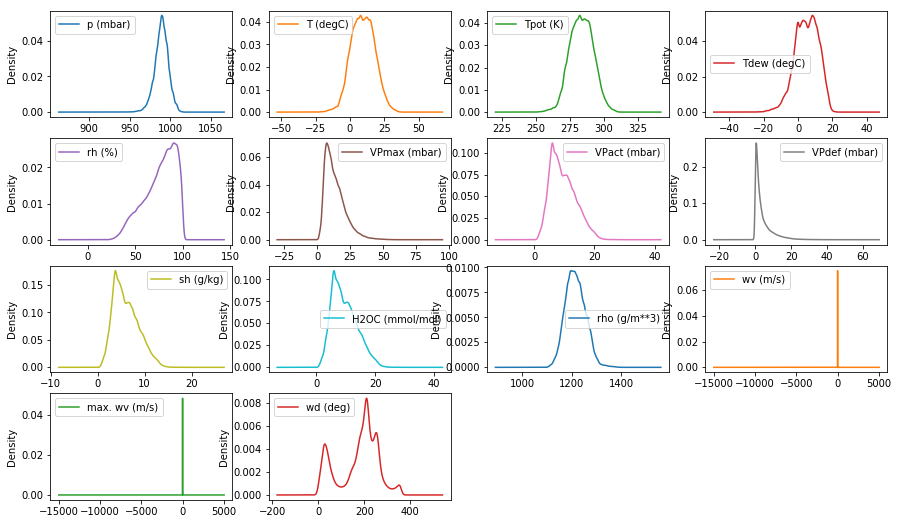

In [7]:
#Identify distribution pattern of the variables in the dataframe 

#Histogram (Shows a few skewed distributions)
df.hist()

#Density plot (Shows a few skewed distributions)
df.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

As observed in the above plots, all the variables have a normal distribution , but wd(deg),max. wv and wv has skewed distribution. Thus dataframe is required to be transformed in order to fit data appropriately for further analysis and applying machine learning algorithms

In [8]:
#renaming variable names to understandable terms:
data = df.rename(columns={'p (mbar)':'pressure', 'T (degC)':'temperatureC','Tpot (K)':'temperatureK','Tdew (degC)':'dewpointTemperatureC','rh (%)':'relativeHumidityPercent','VPmax (mbar)':'maxVaporPressure','VPact (mbar)':'actualVaporPressure','VPdef (mbar)':'defVaporPressure','rho (g/m**3)':'airDensity','wv (m/s)':'windVelocity','max. wv (m/s)':'maxWindVelocity','wd (deg)':'windDirection'})

In [9]:
data.head()

Date Time  pressure  temperatureC  temperatureK  \
0  01.01.2009 00:10:00    996.52         -8.02        265.40   
1  01.01.2009 00:20:00    996.57         -8.41        265.01   
2  01.01.2009 00:30:00    996.53         -8.51        264.91   
3  01.01.2009 00:40:00    996.51         -8.31        265.12   
4  01.01.2009 00:50:00    996.51         -8.27        265.15   

   dewpointTemperatureC  relativeHumidityPercent  maxVaporPressure  \
0                 -8.90                     93.3              3.33   
1                 -9.28                     93.4              3.23   
2                 -9.31                     93.9              3.21   
3                 -9.07                     94.2              3.26   
4                 -9.04                     94.1              3.27   

   actualVaporPressure  defVaporPressure  sh (g/kg)  H2OC (mmol/mol)  \
0                 3.11              0.22       1.94             3.12   
1                 3.02              0.21       1.89             3.03   
2                 3.01              0.20       1.88             3.02   
3                 3.07              0.19       1.92             3.08   
4                 3.08              0.19       1.92             3.09   

   airDensity  windVelocity  maxWindVelocity  windDirection  
0     1307.75          1.03             1.75          152.3  
1     1309.80          0.72             1.50          136.1  
2     1310.24          0.19             0.63          171.6  
3     1309.19          0.34             0.50          198.0  
4     1309.00          0.32             0.63          214.3

# Imputing Data

In order to normalize the distribution for 'windDirection' slicing data greater than 100deg as observed from distribution curve above.

In [10]:
data2 = data[data.windDirection<100]

Thus the transformed density plot below represents a normal distribution :

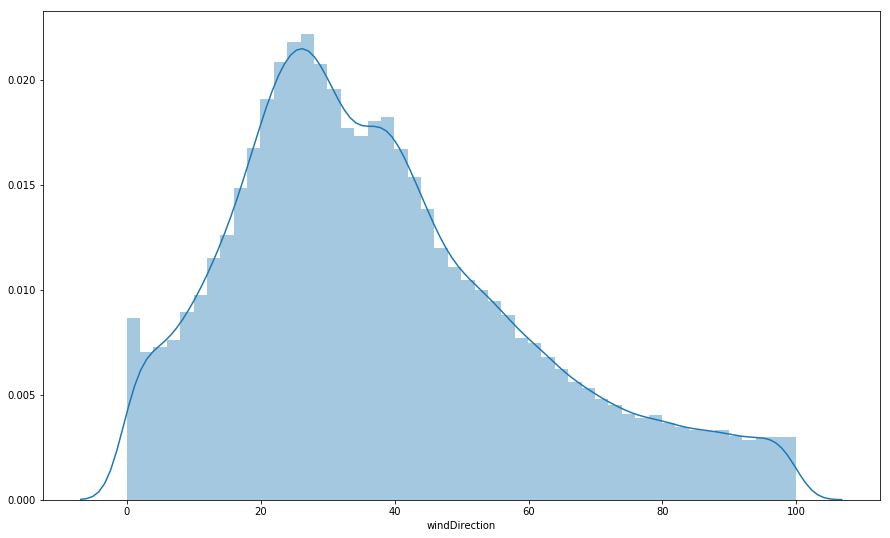

In [11]:
sns.distplot(data2['windDirection'])
plt.show()

Now, observing the distribution of all the variables after imputing dataframe:


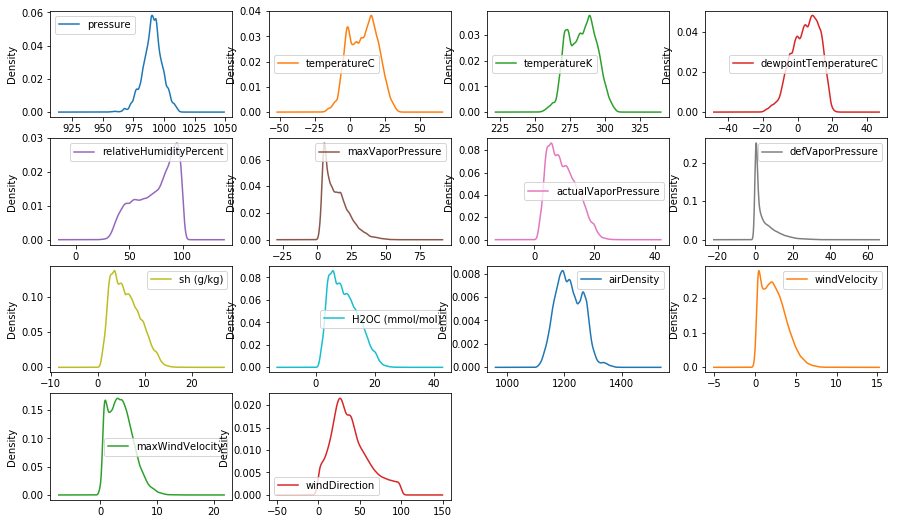

In [12]:
#Density plot
data2.plot(kind='density', subplots=True, layout=(4,4), sharex=False)
plt.show()

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96951 entries, 26 to 420538
Data columns (total 15 columns):
Date Time                  96951 non-null object
pressure                   96951 non-null float64
temperatureC               96951 non-null float64
temperatureK               96951 non-null float64
dewpointTemperatureC       96951 non-null float64
relativeHumidityPercent    96951 non-null float64
maxVaporPressure           96951 non-null float64
actualVaporPressure        96951 non-null float64
defVaporPressure           96951 non-null float64
sh (g/kg)                  96951 non-null float64
H2OC (mmol/mol)            96951 non-null float64
airDensity                 96951 non-null float64
windVelocity               96951 non-null float64
maxWindVelocity            96951 non-null float64
windDirection              96951 non-null float64
dtypes: float64(14), object(1)
memory usage: 11.8+ MB


In [14]:
#Adding a 'Year' column using the 'Date Time' variable
data['Year'] = pd.DatetimeIndex(data['Date Time']).year
data2['Year'] = pd.DatetimeIndex(data2['Date Time']).year

C:\Users\Neha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Identifying outliers for each variable:

Box plots are a good way to observe the outliers for the data.Before the dataframe was imputed, there were a high number of outliers for the variables as shown below:  

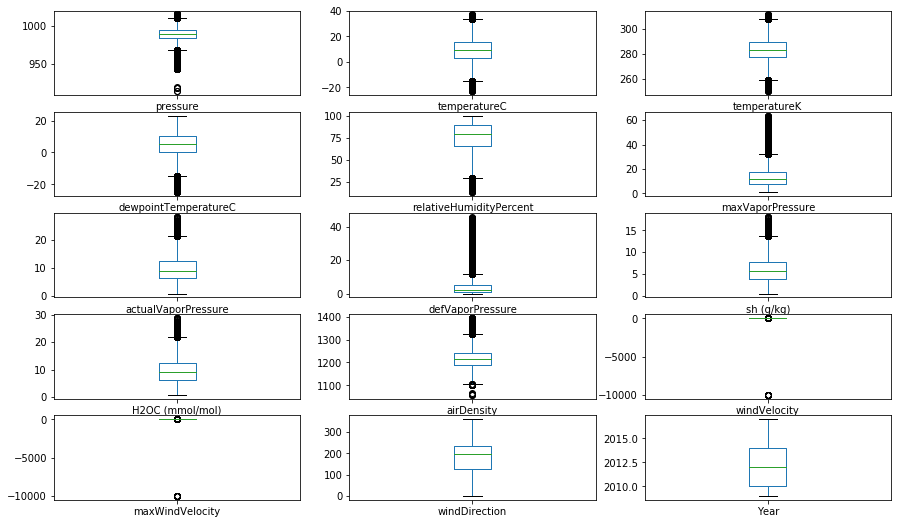

In [15]:
#Before imputing
data.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)
plt.show()

After imputing data, outliers are eliminated . This is important as these are abnormal values that can affect the overall observation due to its very high or low extreme values and hence should be discarded from the data series

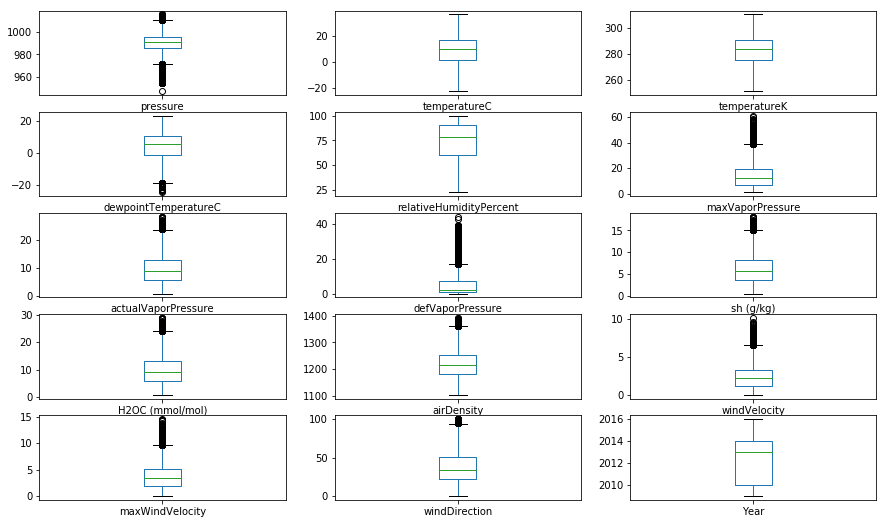

In [16]:
#After Imputing
data2.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False)
plt.show()

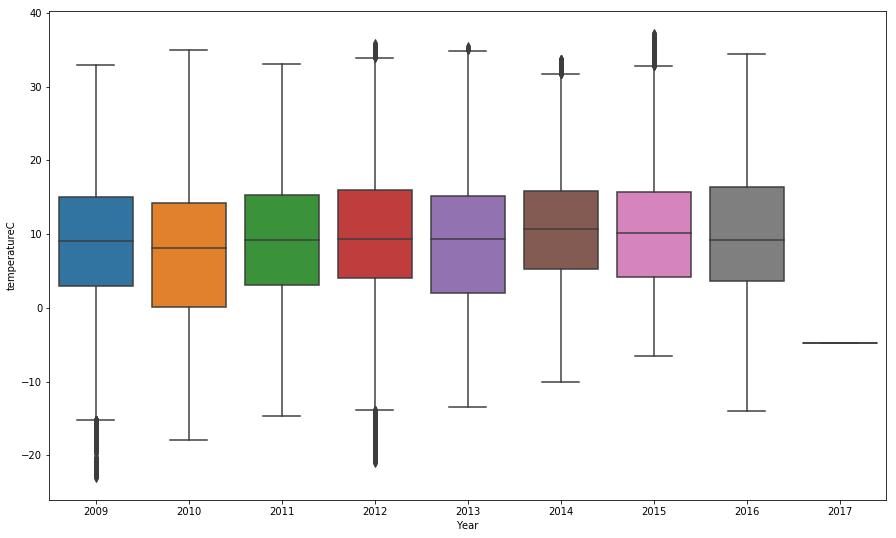

In [17]:
#Observing minimum and maximum temperature in each year (2009-2016) in Jena Before imputing data
sns.boxplot(x="Year", y="temperatureC", data=data)

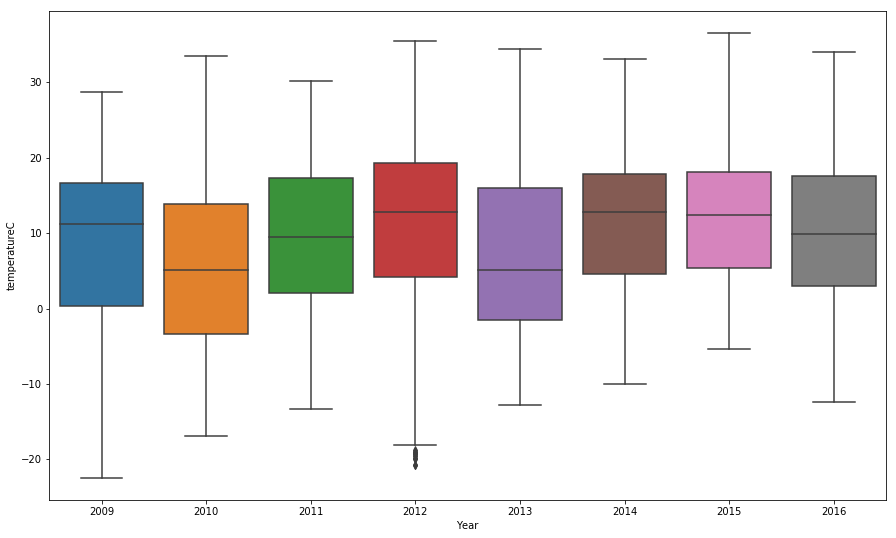

In [18]:
#Observing minimum and maximum temperature in each year (2009-2016) in Jena after imputing data
sns.boxplot(x="Year", y="temperatureC", data=data2)

The following line chart represents the periodicity of The ambient Temperature over the 7 years in Jena

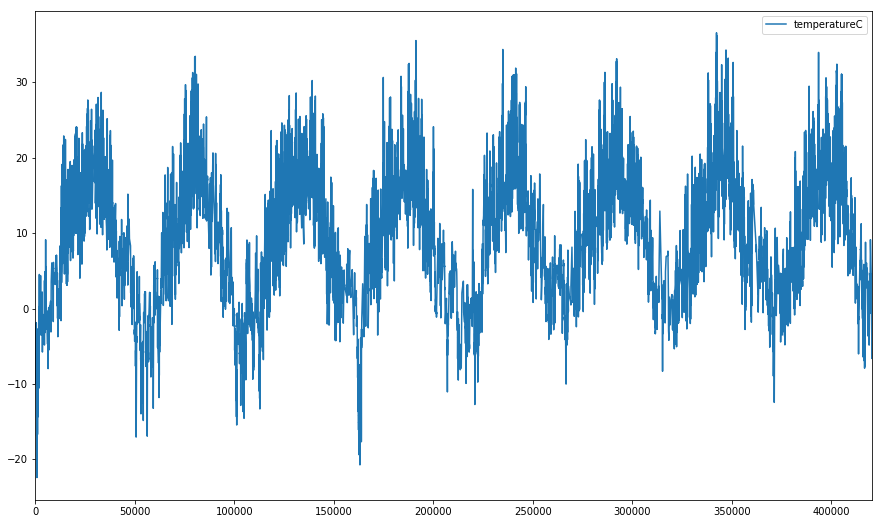

In [19]:
data2.plot(y='temperatureC')

In the following plot, it is depicted that the Dew point temperature is always lower than the ambient temperature of air. The difference between the air temperature and dew point is small, there is more moisture in the air and clouds and fog will likely form.

Text(0,0.5,'Temperature (deg C)')

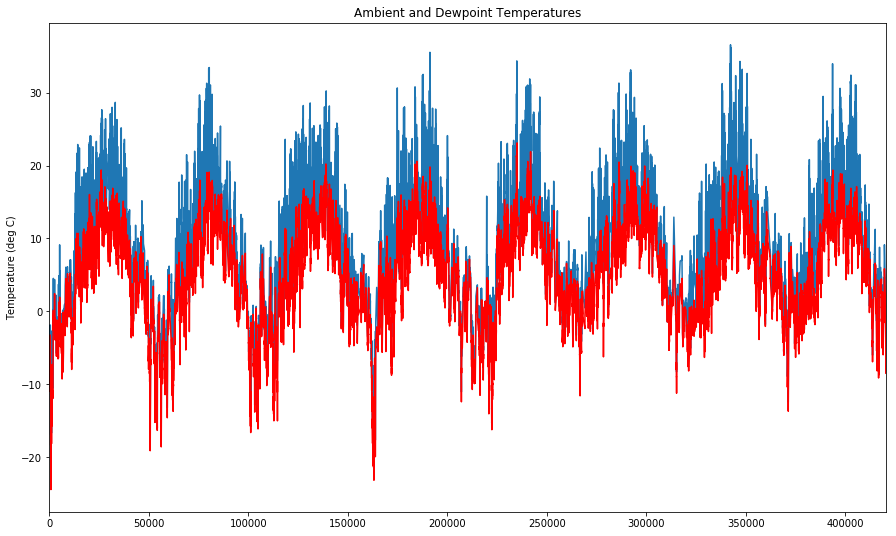

In [20]:
ax = data2.temperatureC.plot(title="Ambient and Dewpoint Temperatures")
data2.dewpointTemperatureC.plot(style="red", ax=ax)
ax.set_ylabel("Temperature (deg C)")

# Identify correlation between different variables 

                         pressure  temperatureC  temperatureK  \
pressure                 1.000000      0.004864     -0.059292   
temperatureC             0.004864      1.000000      0.997938   
temperatureK            -0.059292      0.997938      1.000000   
dewpointTemperatureC    -0.058367      0.910729      0.912866   
relativeHumidityPercent -0.147568     -0.631653     -0.621114   
windVelocity            -0.029614     -0.036892     -0.034965   
windDirection            0.038946      0.139061      0.136404   
airDensity               0.214328     -0.974735     -0.986752   

                         dewpointTemperatureC  relativeHumidityPercent  \
pressure                            -0.058367                -0.147568   
temperatureC                         0.910729                -0.631653   
temperatureK                         0.912866                -0.621114   
dewpointTemperatureC                 1.000000                -0.262420   
relativeHumidityPercent             -0.26242

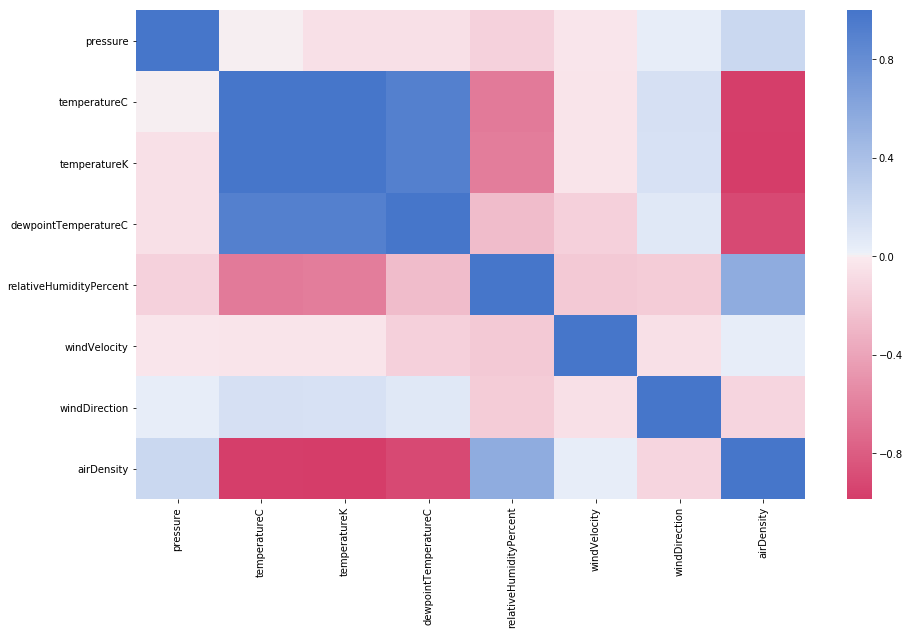

In [21]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data2[['pressure', 'temperatureC', 'temperatureK', 'dewpointTemperatureC','relativeHumidityPercent','windVelocity','windDirection','airDensity']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

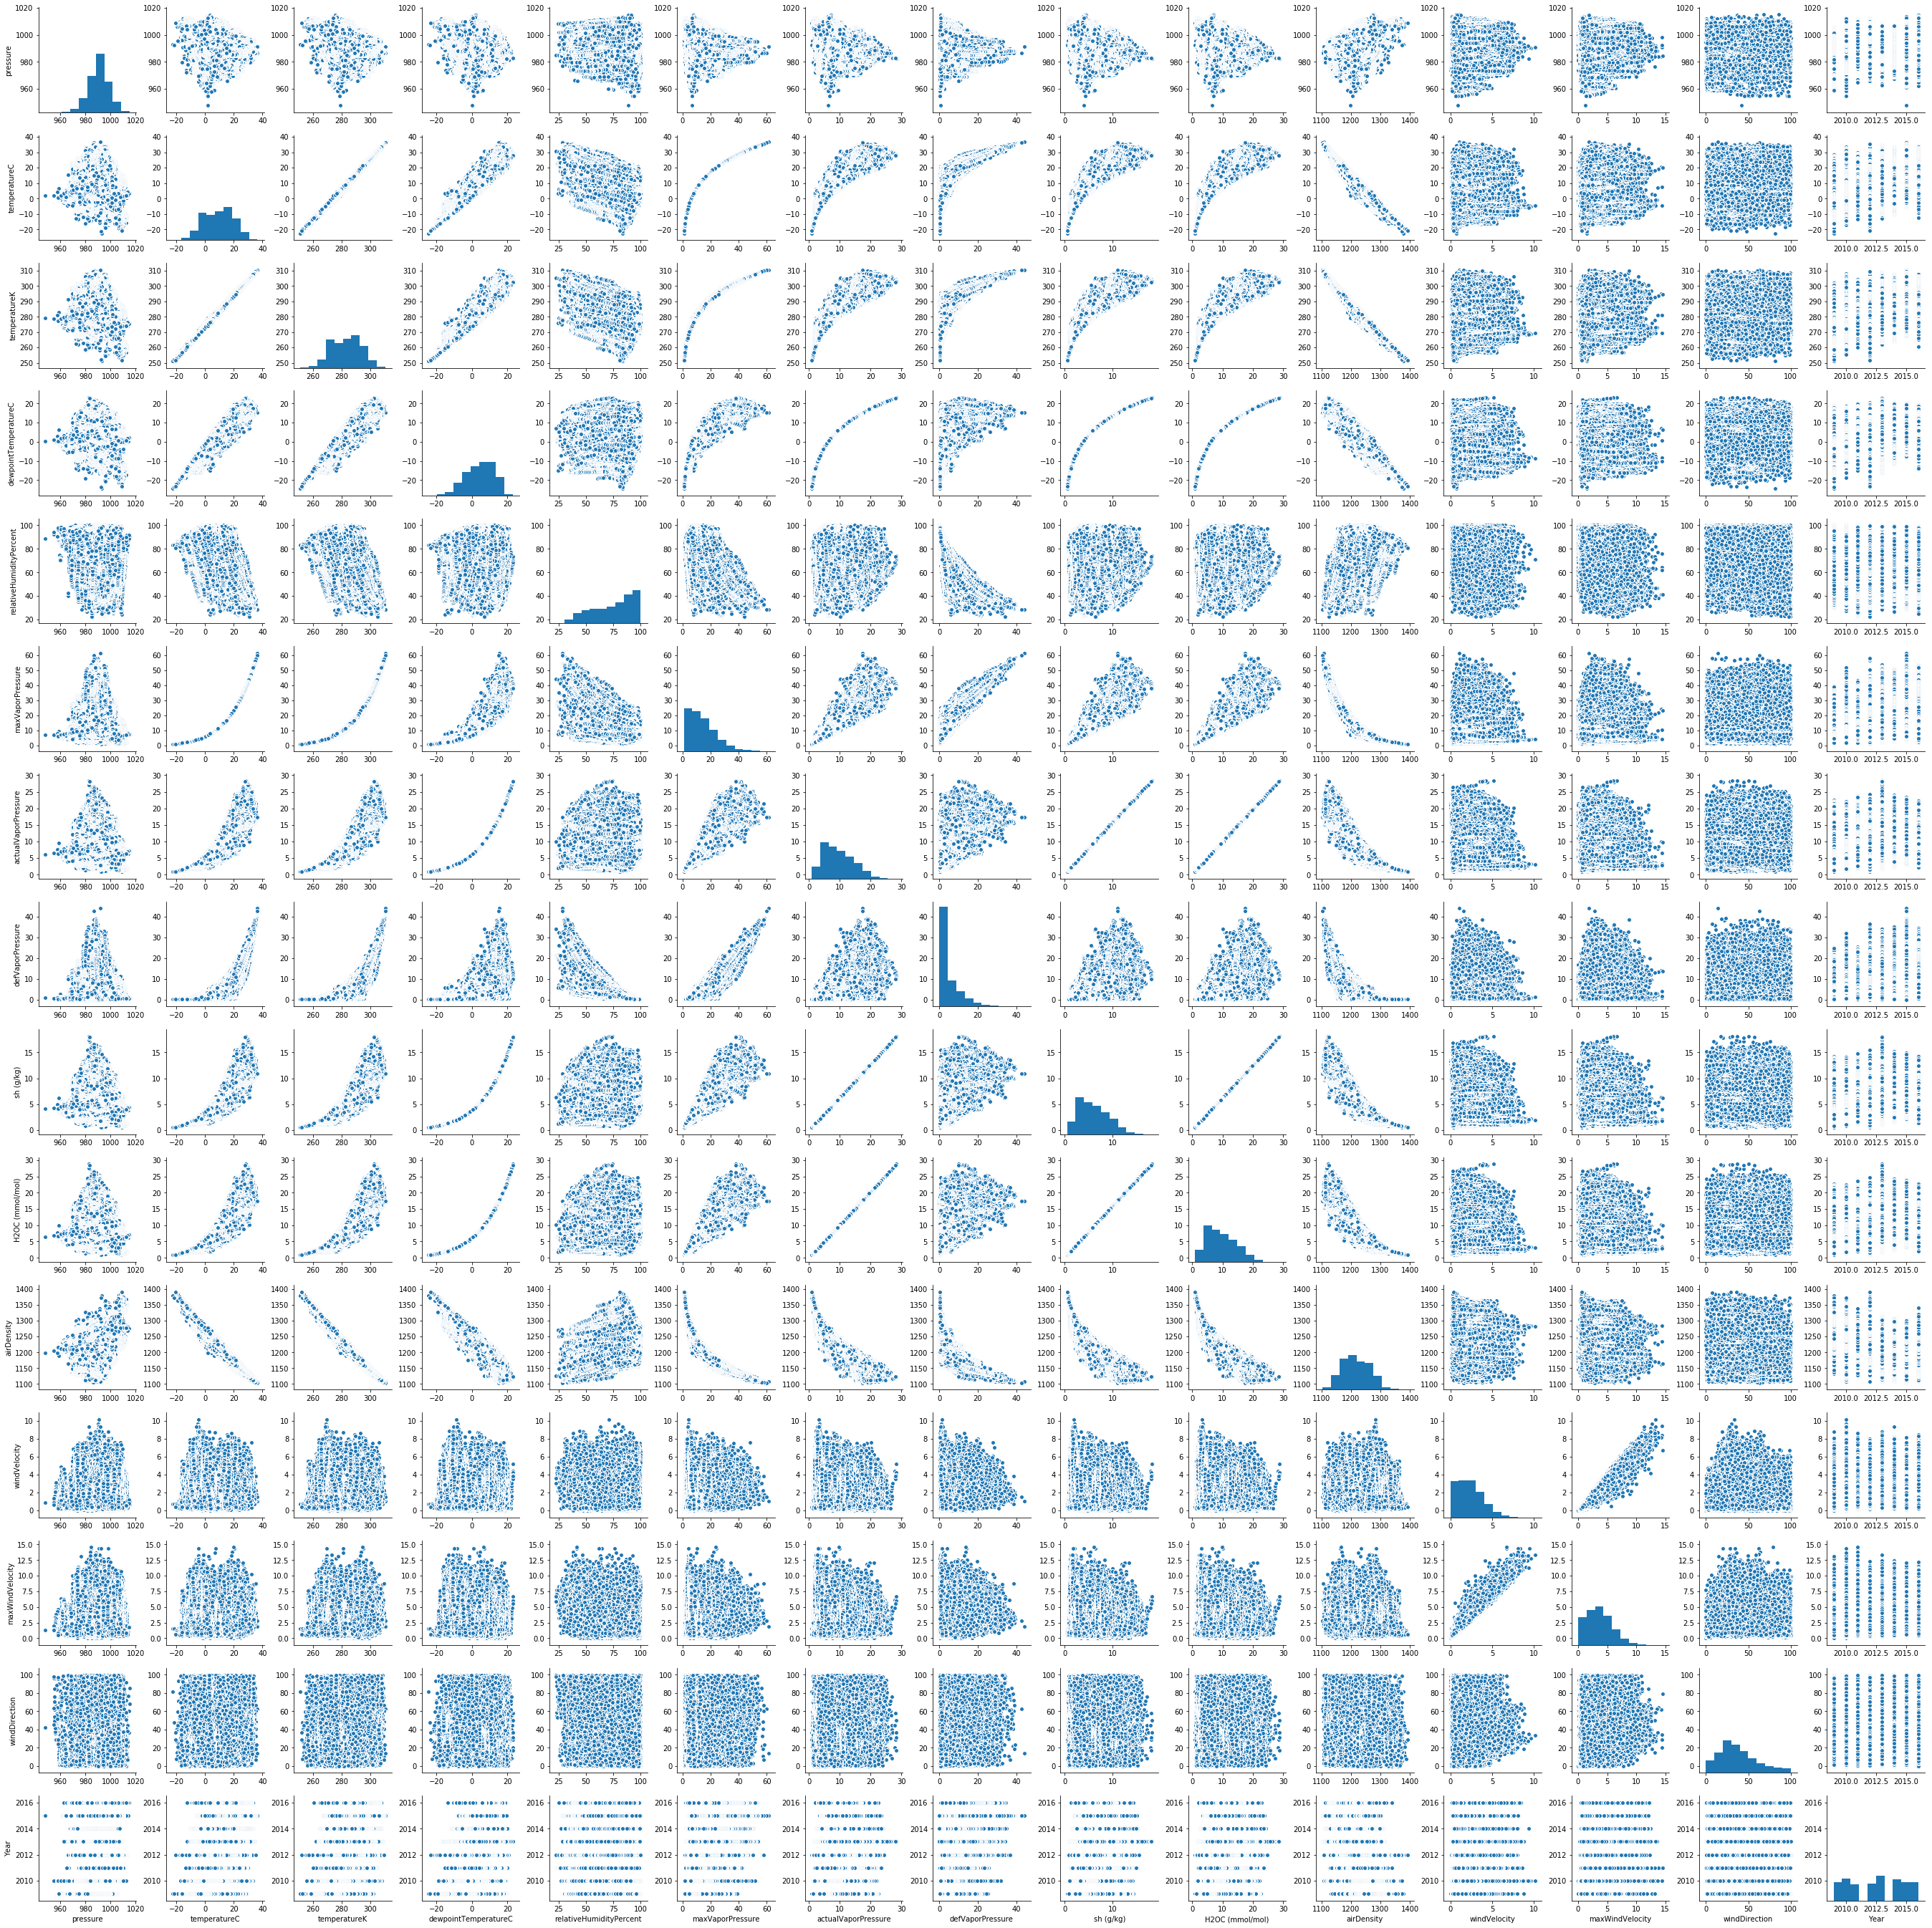

In [22]:
#Correlation between each of the variables using pairplots:
sns.pairplot(data2)

Representing correlation using a heatmap and pairplot: Results obtained show high positive correlation between ambient temperature in Deg Celcius/Kelvin and Dewpoint Temperature. On the other hand , ambient temperature(Deg Celcius and Kelvin) is negatively correlated with Air Density. Least correlation is shown by Wind direction and Temperatures(degC, K , Dew point)